Kaggle Link - [Link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv("./kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


Lets See the information about the data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Price

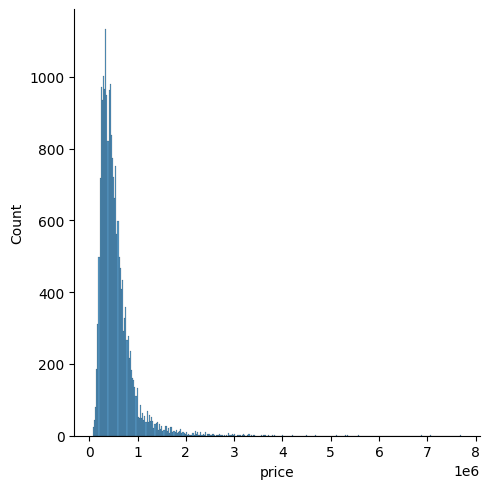

In [26]:
sns.displot(df["price"])

In [27]:
df["price"].min()

np.float64(75000.0)

In [28]:
df["price"].max()

np.float64(7700000.0)

<Axes: xlabel='price'>

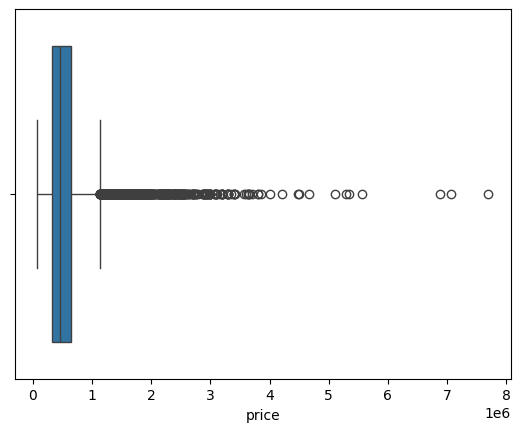

In [30]:
sns.boxplot(data=df,x="price")

<Axes: xlabel='bathrooms', ylabel='price'>

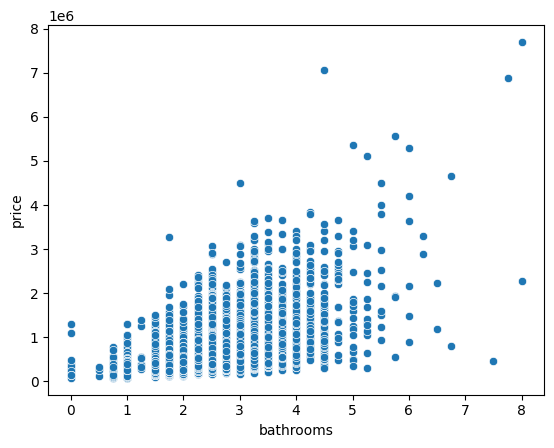

In [33]:
sns.scatterplot(data=df,x="bathrooms",y="price")

<Axes: xlabel='bedrooms', ylabel='price'>

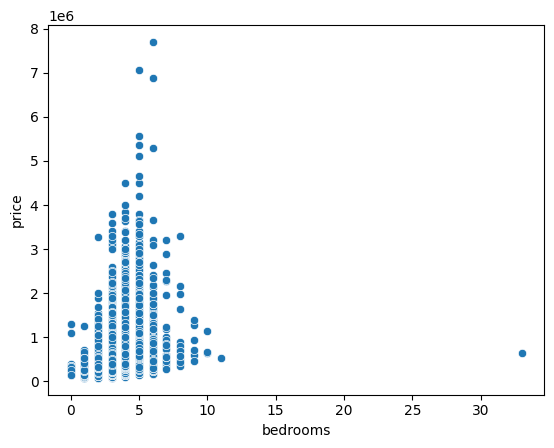

In [34]:
sns.scatterplot(data=df,x="bedrooms",y="price")

## Date

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


we will extract the years only from date column

In [6]:
df["year"] = df["date"].apply(lambda x: x[:4])
df["year"].value_counts()

year
2014    14633
2015     6980
Name: count, dtype: int64

In [48]:
df.groupby("year")["price"].mean()

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

The mean prices of each year is almost similar which shows that the price of the house didnot increase in the following year.

## bedrooms

In [54]:
df.groupby("bedrooms")["bathrooms"].mean()

bedrooms
0     0.826923
1     1.066583
2     1.401721
3     1.968394
4     2.436428
5     2.778576
6     3.068015
7     3.651316
8     3.557692
9     4.416667
10    3.416667
11    3.000000
33    1.750000
Name: bathrooms, dtype: float64

In [66]:
df.groupby("bedrooms")["price"].mean()

bedrooms
0     409503.846
1     317642.884
2     401372.682
3     466232.078
4     635419.504
5     786599.829
6     825520.636
7     951184.658
8    1105076.923
9     893999.833
10    819333.333
11    520000.000
33    640000.000
Name: price, dtype: float64

## bathrooms

In [67]:
df.groupby("bathrooms")["price"].mean()

bathrooms
0.000    448160.000
0.500    237375.000
0.750    294520.861
1.000    347041.235
1.250    621216.667
1.500    409322.207
1.750    454896.097
2.000    457889.719
2.250    533676.774
2.500    553596.504
2.750    660230.354
3.000    708415.232
3.250    970339.781
3.500    931933.145
3.750   1197216.903
4.000   1267709.316
4.250   1525774.430
4.500   1333620.210
4.750   2021303.913
5.000   1673491.905
5.250   1817176.923
5.500   2522300.000
5.750   2492500.000
6.000   2946833.333
6.250   3094000.000
6.500   1709445.000
6.750   2734000.000
7.500    450000.000
7.750   6885000.000
8.000   4990000.000
Name: price, dtype: float64

Bathrooms being in decimals does not make sense. We can think about this

## sqft_living

In [69]:
df["sqft_living"]

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

<Axes: xlabel='sqft_living', ylabel='price'>

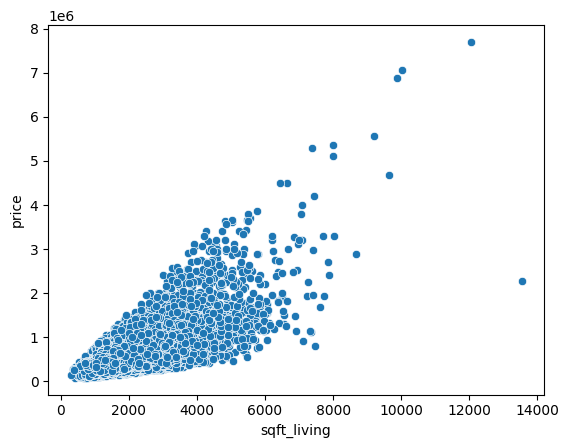

In [70]:
sns.scatterplot(data=df,x="sqft_living",y="price")

The sqft_living has linear relationship with the price. This feature might be very important for our project.

## sqft_lot

In [71]:
df["sqft_lot"]

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64

<Axes: xlabel='sqft_lot', ylabel='price'>

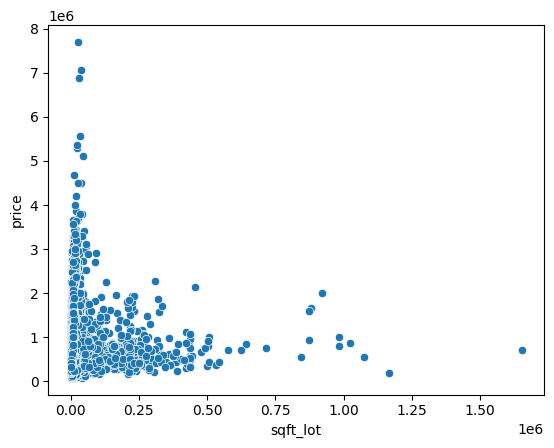

In [72]:
sns.scatterplot(data=df,x="sqft_lot",y="price")

In [74]:
pd.pivot_table(data=df,values="floors",index="bedrooms")

,floors
bedrooms,
0,1.962
1,1.151
2,1.307
3,1.449
4,1.616
5,1.580
6,1.607
7,1.724
8,1.692


In [75]:
df["floors"].value_counts()

floors
1.000    10680
2.000     8241
1.500     1910
3.000      613
2.500      161
3.500        8
Name: count, dtype: int64

In [77]:
df.groupby("bedrooms")["floors"].mean()

bedrooms
0    1.962
1    1.151
2    1.307
3    1.449
4    1.616
5    1.580
6    1.607
7    1.724
8    1.692
9    2.167
10   1.667
11   2.000
33   1.000
Name: floors, dtype: float64

## waterfront

In [81]:
df["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [ ]:
df.groupby("waterfront")["price"].mean()

waterfront
0    531563.600
1   1661876.025
Name: price, dtype: float64

In [83]:
df.groupby("waterfront")["price"].median()

waterfront
0    450000.000
1   1400000.000
Name: price, dtype: float64

This means the price of house increases if there is waterfront.

## view

In [85]:
df["view"]

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: view, Length: 21613, dtype: int64

In [86]:
df["view"].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [87]:
df.groupby("view")["price"].median()

view
0    432500.000
1    690944.000
2    675000.000
3    802500.000
4   1185000.000
Name: price, dtype: float64

Text(0.5, 1.0, 'mean price according to view')

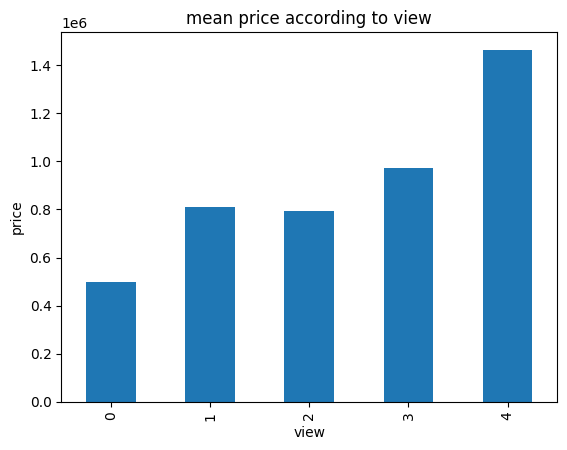

In [97]:

df.groupby("view")["price"].mean().plot(kind='bar')
plt.ylabel("price")
plt.title("mean price according to view")

The more view a house has the more expensive it is

## grade

In [100]:
df["condition"].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

Text(0.5, 1.0, 'Condition Count')

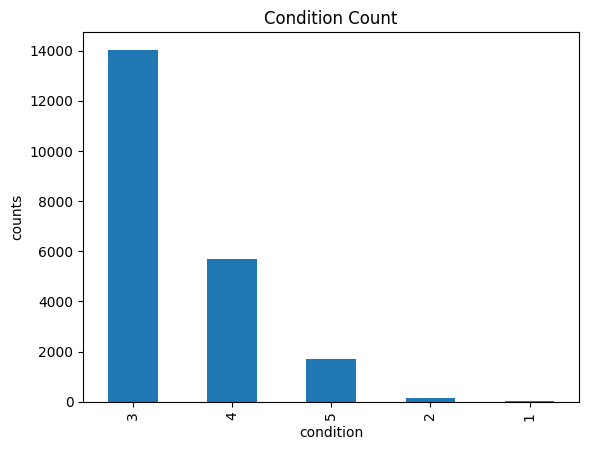

In [105]:
df["condition"].value_counts().plot(kind="bar")
plt.ylabel("counts")
plt.title("Condition Count")

In [106]:
df.groupby("condition")["price"].mean()

condition
1   334431.667
2   327287.145
3   542012.578
4   521200.390
5   612418.089
Name: price, dtype: float64

The houses that are not at good condition are cheapest while the new ones or the best condition houses are expensive.

## grade

In [107]:
df["grade"]

0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64

In [108]:
df["grade"].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [109]:
df.groupby("grade")["price"].mean()

grade
1     142000.000
3     205666.667
4     214381.034
5     248523.971
6     301919.637
7     402590.262
8     542852.766
9     773513.186
10   1071771.074
11   1496841.727
12   2191222.000
13   3709615.385
Name: price, dtype: float64

## sqft_above

In [110]:
df["sqft_above"]

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_above, Length: 21613, dtype: int64

<Axes: xlabel='sqft_above', ylabel='price'>

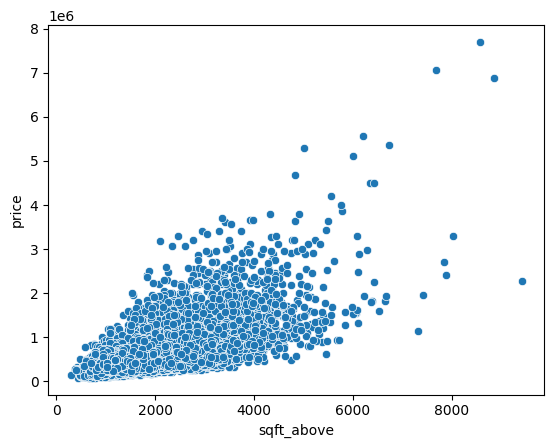

In [112]:
sns.scatterplot(data=df,x="sqft_above",y="price")

In [113]:
df.groupby("sqft_above")["price"].mean()

sqft_above
290     142000.000
370     276000.000
380     245000.000
384     265000.000
390     236500.000
           ...    
7880   2415000.000
8020   3300000.000
8570   7700000.000
8860   6885000.000
9410   2280000.000
Name: price, Length: 946, dtype: float64

As the sqft of the houses increases the price also increases

## sqft_basement

In [115]:
df["sqft_basement"].value_counts()

sqft_basement
0       13126
600       221
700       218
500       214
800       206
        ...  
176         1
225         1
1275        1
274         1
248         1
Name: count, Length: 306, dtype: int64

<Axes: xlabel='sqft_basement', ylabel='price'>

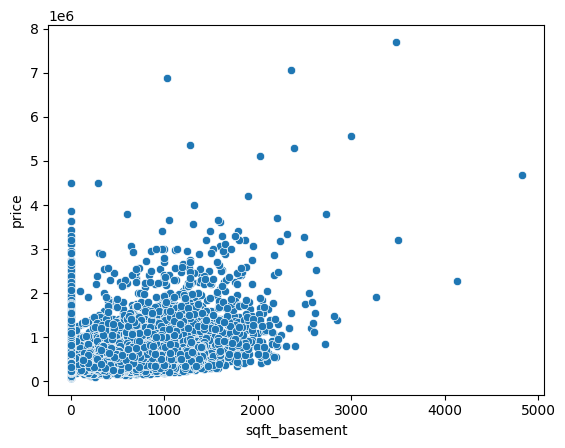

In [116]:
sns.scatterplot(data=df,x="sqft_basement",y="price")

## yr_built

In [117]:
df["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [ ]:
df.groupby("yr_built")["price"].mean()[:20]

yr_built
1900   581387.207
1901   556935.931
1902   673007.407
1903   480958.196
1904   583756.644
1905   752977.986
1906   669799.402
1907   676257.246
1908   564348.686
1909   696135.160
1910   671536.313
1911   632488.356
1912   612990.696
1913   585683.220
1914   615153.481
1915   584896.297
1916   600915.038
1917   528108.929
1918   492246.875
1919   537779.602
Name: price, dtype: float64

In [121]:
df.groupby("yr_built")["price"].mean()

yr_built
1900   581387.207
1901   556935.931
1902   673007.407
1903   480958.196
1904   583756.644
          ...    
2011   544522.000
2012   527447.335
2013   678545.453
2014   683681.755
2015   759785.158
Name: price, Length: 116, dtype: float64

In [ ]:
df["yr_renovated"].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [124]:
df.groupby("yr_renovated")["price"].mean()

yr_renovated
0      530360.818
1934   459950.000
1940   378400.000
1944   521000.000
1945   398666.667
          ...    
2011   607496.154
2012   625181.818
2013   664663.514
2014   654756.253
2015   658843.750
Name: price, Length: 70, dtype: float64

# Correlation

<Axes: >

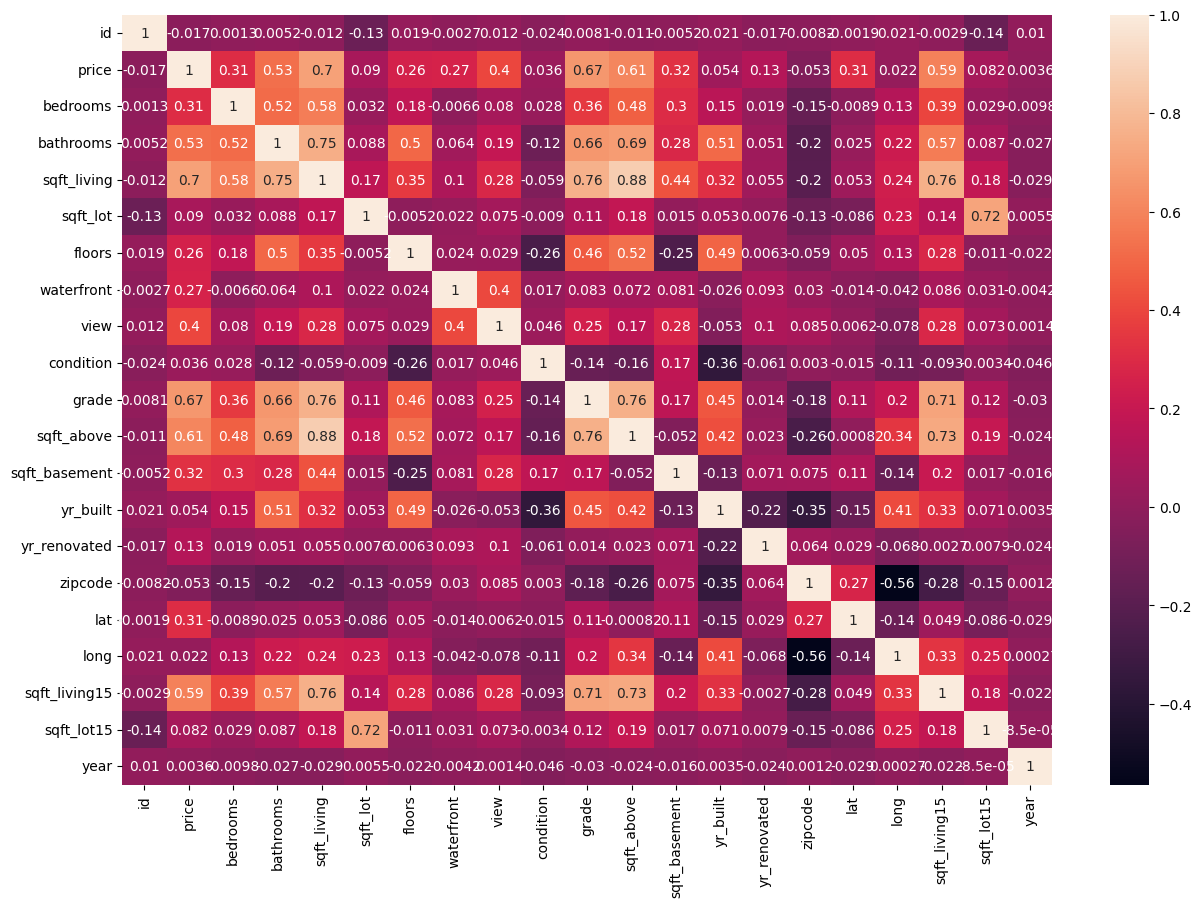

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop("date",axis=1).corr(),annot=True)

In [129]:
df.drop("date",axis=1).corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,...,-0.011,-0.005,0.021,-0.017,-0.008,-0.002,0.021,-0.003,-0.139,0.010
price,-0.017,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,...,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082,0.004
bedrooms,0.001,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,...,0.478,0.303,0.154,0.019,-0.153,-0.009,0.129,0.392,0.029,-0.010
bathrooms,0.005,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,...,0.685,0.284,0.506,0.051,-0.204,0.025,0.223,0.569,0.087,-0.027
sqft_living,-0.012,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,...,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183,-0.029
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,...,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719,0.005
floors,0.019,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,...,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011,-0.022
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,...,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031,-0.004
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,...,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073,0.001
condition,-0.024,0.036,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,...,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003,-0.046


# Dropping Columns

In [7]:
# df1 = df.drop(["id","date","year","lat","long","zipcode","yr_built","yr_renovated"],axis=1)
df1 = df.drop(["id","date","year","zipcode","yr_built","yr_renovated"],axis=1)

In [432]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.307,0.022,0.585,0.082
bedrooms,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,-0.009,0.129,0.392,0.029
bathrooms,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.025,0.223,0.569,0.087
sqft_living,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.053,0.240,0.756,0.183
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,-0.086,0.230,0.145,0.719
floors,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.050,0.125,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.014,-0.042,0.086,0.031
view,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,0.006,-0.078,0.280,0.073
condition,0.036,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.015,-0.107,-0.093,-0.003
grade,0.667,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.114,0.198,0.713,0.119


In [433]:
df1.corr() > 0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False


In [8]:
corr_matrix = df1.corr()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(int)  # Upper triangle mask
high_corr = (corr_matrix > 0.8) & mask

to_drop = [column for column in high_corr.columns if any(high_corr[column])]
to_drop

['sqft_above']

In [9]:
for i in df1:
    for j in df1:
        correlation = df1[i].corr(df1[j])
        if i != j and correlation > 0.6:
            print(f"{i} and {j} has correlation: {correlation}")

price and sqft_living has correlation: 0.7020350546118003
price and grade has correlation: 0.667434256020237
price and sqft_above has correlation: 0.605567298356078
bathrooms and sqft_living has correlation: 0.7546652789673732
bathrooms and grade has correlation: 0.6649825338780713
bathrooms and sqft_above has correlation: 0.6853424758761589
sqft_living and price has correlation: 0.7020350546118002
sqft_living and bathrooms has correlation: 0.7546652789673732
sqft_living and grade has correlation: 0.7627044764584703
sqft_living and sqft_above has correlation: 0.8765965986813173
sqft_living and sqft_living15 has correlation: 0.756420259017221
sqft_lot and sqft_lot15 has correlation: 0.7185567524330344
grade and price has correlation: 0.667434256020237
grade and bathrooms has correlation: 0.6649825338780713
grade and sqft_living has correlation: 0.7627044764584702
grade and sqft_above has correlation: 0.7559229376236448
grade and sqft_living15 has correlation: 0.7132020930151741
sqft_abo

We will drop the columns that has more than 0.6 correlation with each other. This removes one of the correlated columns from each pair.



In [10]:
df2 = df1.drop(['sqft_living','sqft_living15', 'sqft_lot15'],axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long
0,221900.000,3,1.000,5650,1.000,0,0,3,7,1180,0,47.511,-122.257
1,538000.000,3,2.250,7242,2.000,0,0,3,7,2170,400,47.721,-122.319
2,180000.000,2,1.000,10000,1.000,0,0,3,6,770,0,47.738,-122.233
3,604000.000,4,3.000,5000,1.000,0,0,5,7,1050,910,47.521,-122.393
4,510000.000,3,2.000,8080,1.000,0,0,3,8,1680,0,47.617,-122.045


# Data Splitting

In [11]:
X = df2.drop("price",axis=1)
y = df2["price"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

# Data Scaling

In [13]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# Model Building


=== Checking Linear Regression Assumptions ===


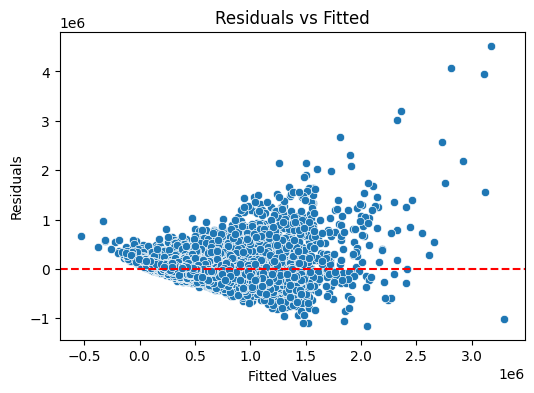

In [476]:
X_const = sm.add_constant(X)

# Fit Linear Regression model
model = sm.OLS(y, X_const).fit()
residuals = model.resid
fitted_values = model.fittedvalues

print("\n=== Checking Linear Regression Assumptions ===")

# 1️⃣ Linearity Check (Residuals vs. Fitted Values Plot)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


In [477]:
residuals

0        -40355.305
1       -134520.328
2        -82355.067
3         84277.637
4         35430.672
            ...    
21608   -157076.738
21609   -162660.393
21610    109338.561
21611     14991.870
21612     32432.285
Length: 21613, dtype: float64

In [478]:
fitted_values

0       262255.305
1       672520.328
2       262355.067
3       519722.363
4       474569.328
           ...    
21608   517076.738
21609   562660.393
21610   292762.439
21611   385008.130
21612   292567.715
Length: 21613, dtype: float64

In [479]:
y - fitted_values

0        -40355.305
1       -134520.328
2        -82355.067
3         84277.637
4         35430.672
            ...    
21608   -157076.738
21609   -162660.393
21610    109338.561
21611     14991.870
21612     32432.285
Length: 21613, dtype: float64

# Normal Residual

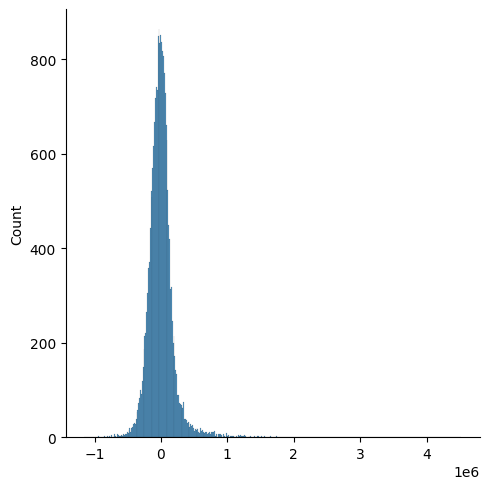

In [480]:
sns.displot(residuals)

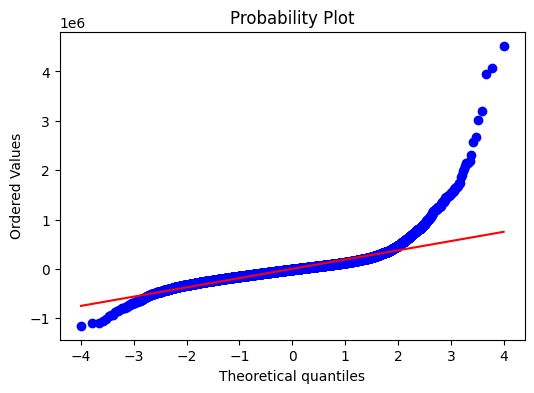

In [481]:
from scipy.stats import probplot

fig,ax = plt.subplots(figsize=(6,4))
probplot(residuals,plot=ax,fit=True)
plt.show()

## Homoscedasticity

Homo - Same
scdeasticity - spread or scatter

means having same scatter.

Means when we plot the residuals the spread should be equal and if not its heteroscdeasticity.

In [482]:
lr = LinearRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
residual_lr = y_test - y_pred
residual_lr

16211     95892.128
11971   -130564.071
14532   -136747.787
12896    -30225.720
3950    -281634.579
            ...    
16760   -130735.056
14721     66220.315
14513    887330.717
19538   -170269.995
13461    -81023.512
Name: price, Length: 4323, dtype: float64

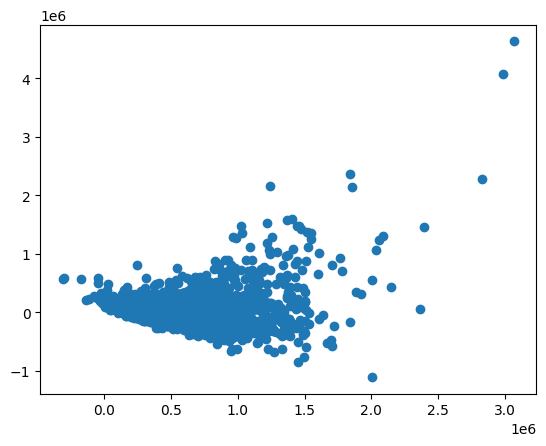

In [364]:
plt.scatter(y_pred,residual_lr)

## No Autocorrelation

no relationship between residuals

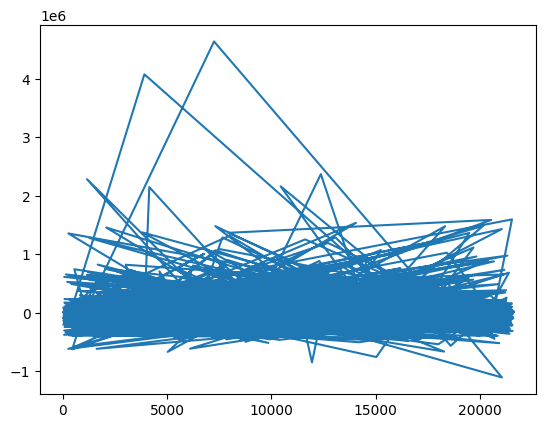

In [365]:
plt.plot(residual_lr)

## VIF

In [366]:
curr_data = df1.drop("price",axis=1)
# Manual VIF Calculation
vif_manual = {}

for feature in X.columns:
    # Define the target variable (current feature) and predictors (all other features)
    X = curr_data.drop(columns=[feature])
    y = curr_data[feature]

    model = LinearRegression()
    model.fit(X, y)

    # Calculate R-squared
    r_squared = model.score(X, y)

    # Calculate VIF
    vif = 1 / ((1 - r_squared) + 0.000001)
    vif_manual[feature] = vif

vif_manual_df = pd.DataFrame(list(vif_manual.items()), columns=['Feature', 'VIF'])
vif_manual_df

,Feature,VIF
0,bedrooms,1.642
1,bathrooms,2.976
2,sqft_lot,2.098
3,floors,1.907
4,waterfront,1.200
5,view,1.405
6,condition,1.106
7,grade,3.230
8,sqft_above,1000000.000
9,sqft_basement,1000000.000


In [487]:
def calc_vif(X):
    vif_data = pd.DataFrame()
    vif_data["variables"] = X.columns  # Exclude intercept
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_statsmodels = calc_vif(X)
vif_statsmodels

,variables,VIF
0,bedrooms,23.157
1,bathrooms,25.023
2,sqft_living,inf
3,sqft_lot,2.365
4,floors,16.346
5,waterfront,1.208
6,view,1.507
7,condition,31.392
8,grade,137.677
9,sqft_above,inf


# Model Building

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_trf,y_train)
y_pred = model.predict(X_test_trf)

In [18]:
print(f"R2 Score is :{r2_score(y_test,y_pred)}")
print(f"Mean Squared Error is :{mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error is :{np.sqrt(mean_squared_error(y_test,y_pred))}")

R2 Score is :0.6664539327828526
Mean Squared Error is :54756711466.30917
Root Mean Squared Error is :234001.52022221815


In [19]:
print(f"R2 Score is :{r2_score(y_test,y_pred)}")
print(f"Mean Squared Error is :{mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error is :{np.sqrt(mean_squared_error(y_test,y_pred))}")

R2 Score is :0.6664539327828526
Mean Squared Error is :54756711466.30917
Root Mean Squared Error is :234001.52022221815


In [460]:
from sklearn.metrics import r2_score

def adjusted_r2(r_squared, number_of_samples, number_of_independent_features):
    return 1 - ((1 - r_squared) * (number_of_samples - 1) / (number_of_samples - number_of_independent_features - 1))

# Example usage
number_of_samples = len(y_test)
number_of_independent_features = X.shape[1]
r_squared = r2_score(y_test, y_pred)

adj_r2 = adjusted_r2(r_squared, number_of_samples, number_of_independent_features)
print("Adjusted R²:", adj_r2)

Adjusted R²: 0.6655252662383965


# PCA

In [373]:
from sklearn.decomposition import PCA

In [462]:
for i in range(1,X_train_trf.shape[1]):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_trf,y_train)
    X_test_pca = pca.transform(X_test_trf)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_test_pca)

    print("\n")
    print(f"--- Model Metrics with {i} Components")
    print(f"R2 Score is :{r2_score(y_test,y_pred)}")
    print(f"Mean Squared Error is :{mean_squared_error(y_test,y_pred)}")
    print(f"Root Mean Squared Error is :{np.sqrt(mean_squared_error(y_test,y_pred))}")
    print("\n")




--- Model Metrics with 1 Components
R2 Score is :0.40274961118759367
Mean Squared Error is :98047827354.68764
Root Mean Squared Error is :313125.8969722684




--- Model Metrics with 2 Components
R2 Score is :0.5434331305806872
Mean Squared Error is :74952466213.89073
Root Mean Squared Error is :273774.4805745976




--- Model Metrics with 3 Components
R2 Score is :0.5517897808609948
Mean Squared Error is :73580593680.53612
Root Mean Squared Error is :271257.43064575415




--- Model Metrics with 4 Components
R2 Score is :0.5663349922447886
Mean Squared Error is :71192773762.27469
Root Mean Squared Error is :266819.74020352145




--- Model Metrics with 5 Components
R2 Score is :0.593746564518741
Mean Squared Error is :66692743027.79291
Root Mean Squared Error is :258249.38146642852




--- Model Metrics with 6 Components
R2 Score is :0.6055934573844537
Mean Squared Error is :64747893550.68067
Root Mean Squared Error is :254456.07391194394




--- Model Metrics with 7 Components
R2 S

# SGD Regressor

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error

sgdr = SGDRegressor()
sgdr.fit(X_train_trf,y_train)
y_pred = sgdr.predict(X_test_trf)

print("\n")
print(f"--- Model Metrics with {i} Components")
print(f"R2 Score is :{r2_score(y_test,y_pred)}")
print(f"Mean Squared Error is :{mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error is :{np.sqrt(mean_squared_error(y_test,y_pred))}")
print("\n")




--- Model Metrics with sqft_lot15 Components
R2 Score is :0.6716745731034164
Mean Squared Error is :53899663148.85327
Root Mean Squared Error is :232163.0098634433


